# **WEEK 1**
• Collect datasets related to tasks (e.g., Trello, Jira APIs, synthetic task datasets).

• Perform exploratory data analysis (EDA) and clean data.

• Apply NLP preprocessing on task descriptions (tokenization, stemming, stopword
removal).

In [ ]:
#Install Required Libraries
!pip install kagglehub[pandas-datasets] nltk seaborn matplotlib --quiet

In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Load Dataset from KaggleHub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/cleaned_tasks_with_status.csv")

df.head()

,Task Description,Category,Skill,Status,cleaned_description
0,Implement user authentication,backend,spring boot,To Do,implement user authent
1,Optimize server performance,backend,asp.net,Completed,optim server perform
2,Manage database operations,backend,django,Completed,manag databas oper
3,Implement user authentication,backend,api,To Do,implement user authent
4,Build a microservice,backend,kotlin,To Do,build microservic


# **Exploratory Data Analysis**

In [ ]:
# Check structure and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Task Description     1982 non-null   object
 1   Category             1982 non-null   object
 2   Skill                1982 non-null   object
 3   Status               1982 non-null   object
 4   cleaned_description  1982 non-null   object
dtypes: object(5)
memory usage: 77.6+ KB


In [ ]:
df.isnull().sum()

,0
Task Description,0
Category,0
Skill,0
Status,0
cleaned_description,0


In [ ]:
#Drop missing and duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.columns)

Index(['Task Description', 'Category', 'Skill', 'Status',
       'cleaned_description'],
      dtype='object')


/tmp/ipython-input-15-2814697821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='viridis')


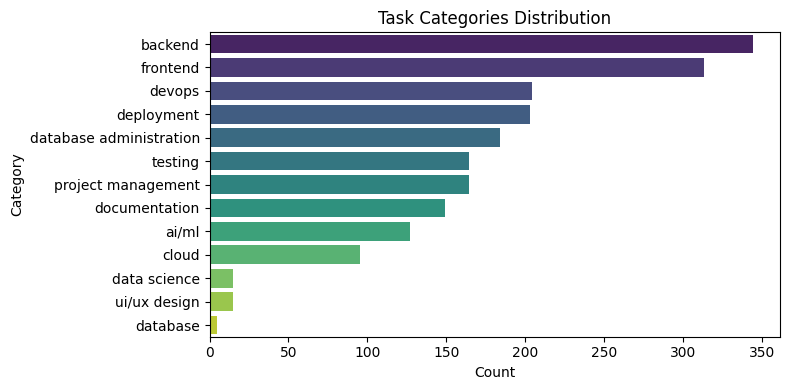

In [ ]:
# Plot 1: Task Category Distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title("Task Categories Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()


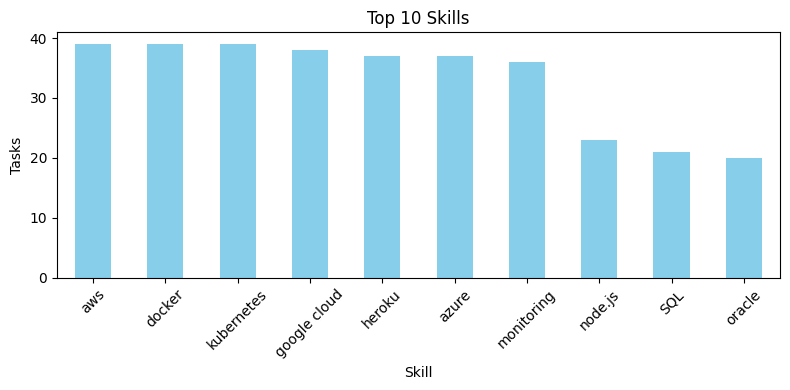

In [ ]:
# Plot 2: Top 10 Skills
plt.figure(figsize=(8,4))
df['Skill'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Skills")
plt.ylabel("Tasks")
plt.xticks(rotation=45)
plt.tight_layout()

# **NLP Preprocessing on task description**

In [ ]:
print(df.columns)

Index(['Task Description', 'Category', 'Skill', 'Status',
       'cleaned_description'],
      dtype='object')


In [ ]:
# NLP Preprocessing for Task Description
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess_text(text):
    if not isinstance(text, str) or pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_description'] = df['Task Description'].apply(preprocess_text)

In [ ]:
csv_path = "/content/drive/MyDrive/cleaned_tasks_with_status.csv"
df.to_csv(csv_path, index=False)



# **WEEK 2**

• Feature extraction using TF-IDF/word embeddings (Word2Vec/BERT).

• Implement task classification using Naive Bayes and SVM.

• Set up version control with GitHub.

• Evaluate using accuracy, precision, recall.

In [ ]:

#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# ✅ Load the cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/cleaned_tasks_with_status.csv")
df.columns = df.columns.str.strip()  # remove any leading/trailing spaces in column names

print("Columns available:", df.columns.tolist())

Columns available: ['Task Description', 'Category', 'Skill', 'Status', 'cleaned_description']


In [ ]:
df.head()

,Task Description,Category,Skill,Status,cleaned_description
0,Implement user authentication,backend,spring boot,To Do,implement user authent
1,Optimize server performance,backend,asp.net,Completed,optim server perform
2,Manage database operations,backend,django,Completed,manag databas oper
3,Implement user authentication,backend,api,To Do,implement user authent
4,Build a microservice,backend,kotlin,To Do,build microservic


In [ ]:
# ✅ Drop rows with missing text or target
df.dropna(subset=['cleaned_description', 'Category'], inplace=True)

In [ ]:
# ✅ Feature and Target
X = df['cleaned_description']
y = df['Category']

In [ ]:
# ✅ Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

TF-IDF **Vectorization**

In [ ]:
# ✅ TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Naive **Bayes**

In [ ]:
# ✅ Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

**SVM**

In [ ]:
# ✅ Train SVM
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)

LinearSVC()

In [ ]:
# ✅ Evaluation Function
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n📋 Evaluation Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=y.unique())
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=y.unique(), yticklabels=y.unique())
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()



📋 Evaluation Report for Naive Bayes:

                         precision    recall  f1-score   support

                  ai/ml       0.96      0.86      0.91        28
                backend       0.91      0.99      0.94        68
                  cloud       1.00      0.78      0.88        23
           data science       0.00      0.00      0.00         2
database administration       0.93      1.00      0.96        38
             deployment       0.90      1.00      0.95        36
                 devops       1.00      1.00      1.00        39
          documentation       1.00      1.00      1.00        24
               frontend       0.96      0.97      0.97        72
     project management       1.00      1.00      1.00        34
                testing       1.00      1.00      1.00        29
           ui/ux design       0.00      0.00      0.00         4

               accuracy                           0.95       397
              macro avg       0.80      0.80     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


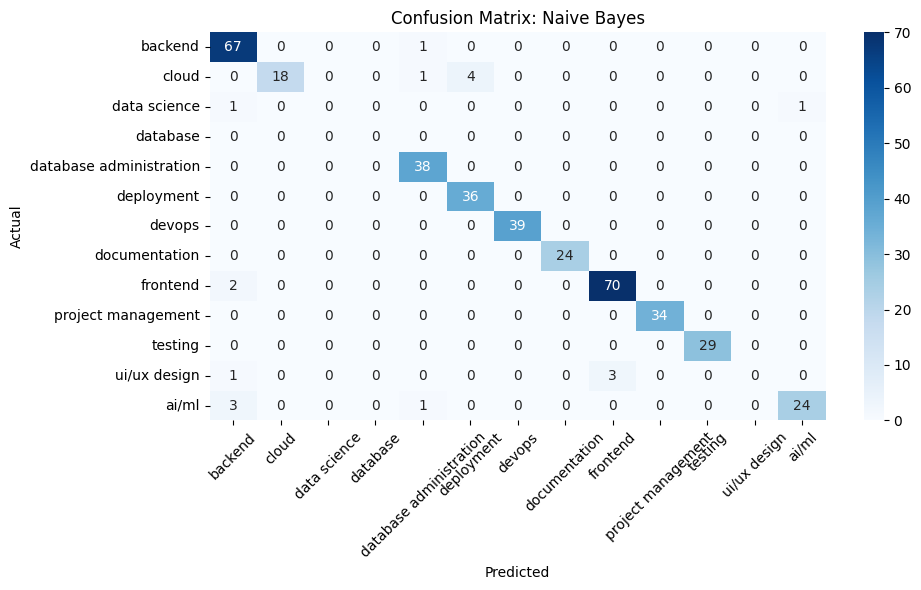

In [ ]:
evaluate(nb_model, X_test_vec, y_test, "Naive Bayes")



📋 Evaluation Report for SVM:

                         precision    recall  f1-score   support

                  ai/ml       0.96      0.93      0.95        28
                backend       0.97      1.00      0.99        68
                  cloud       1.00      0.96      0.98        23
           data science       1.00      1.00      1.00         2
database administration       1.00      1.00      1.00        38
             deployment       1.00      1.00      1.00        36
                 devops       1.00      1.00      1.00        39
          documentation       1.00      1.00      1.00        24
               frontend       1.00      0.97      0.99        72
     project management       0.97      1.00      0.99        34
                testing       1.00      1.00      1.00        29
           ui/ux design       0.80      1.00      0.89         4

               accuracy                           0.99       397
              macro avg       0.98      0.99      0.98   

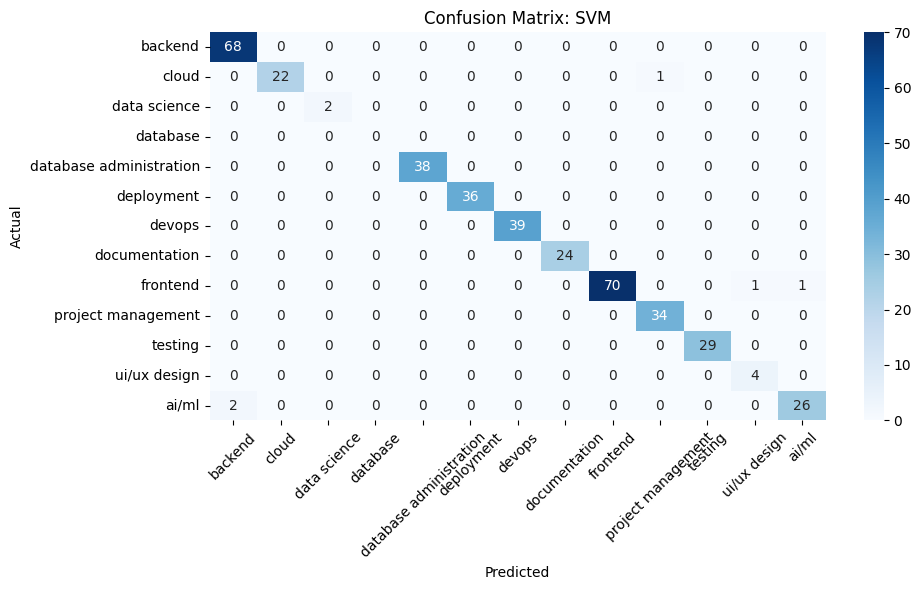

In [ ]:
evaluate(svm_model, X_test_vec, y_test, "SVM")

# **WEEK 3**
• Implement priority prediction model using Random Forest/XGBoost.

• Integrate workload balancing logic using heuristic or ML approach.

• Apply GridSearchCV for hyperparameter tuning.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# ✅ Load the cleaned dataset with status
df = pd.read_csv("/content/drive/MyDrive/cleaned_tasks_with_status.csv")

# ✅ Drop rows with missing values in required columns
df_priority = df.dropna(subset=['cleaned_description', 'Status'])

# ✅ Features and Target
X_p = df_priority['cleaned_description']
y_p = df_priority['Status']

# ✅ Label Encoding
le_status = LabelEncoder()
y_p_encoded = le_status.fit_transform(y_p)

# ✅ Train/Test Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p_encoded, test_size=0.2, random_state=42)

# ✅ TF-IDF Vectorization
vectorizer_p = TfidfVectorizer(max_features=3000)
X_train_vec_p = vectorizer_p.fit_transform(X_train_p)
X_test_vec_p = vectorizer_p.transform(X_test_p)

# ✅ Train Random Forest
rf_p = RandomForestClassifier(random_state=42)
rf_p.fit(X_train_vec_p, y_train_p)
y_pred_p = rf_p.predict(X_test_vec_p)

# ✅ Evaluation
print("🎯 Priority Prediction Accuracy:", accuracy_score(y_test_p, y_pred_p))
print("📊 Classification Report:")
print(classification_report(y_test_p, y_pred_p, target_names=le_status.classes_))


🎯 Priority Prediction Accuracy: 0.15365239294710328
📊 Classification Report:
              precision    recall  f1-score   support

   Completed       0.16      0.21      0.18       125
 In Progress       0.12      0.10      0.11       135
       To Do       0.17      0.16      0.17       137

    accuracy                           0.15       397
   macro avg       0.15      0.15      0.15       397
weighted avg       0.15      0.15      0.15       397



In [ ]:
# Re-load cleaned data
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/cleaned_tasks_with_status.csv")

# Limit to top 20 most frequent skills (or all if needed)
top_skills = df['Skill'].value_counts().nlargest(20).index.tolist()
df_skill = df[df['Skill'].isin(top_skills)].dropna(subset=['cleaned_description', 'Skill'])


In [ ]:
balanced_df = balance_tasks(df_skill)
print(balanced_df[['Task Description', 'Skill', 'Assigned User']].head())


                 Task Description        Skill Assigned User
0   Implement user authentication  spring boot        User A
2      Manage database operations       django        User B
6   Implement user authentication  spring boot        User C
11           Build a microservice       django        User A
13           Build a microservice      node.js        User B


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_rf.fit(X_train_vec, y_train)

print("🔍 Best Parameters:", grid_rf.best_params_)
print("🎯 Best Score:", grid_rf.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
🔍 Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
🎯 Best Score: 0.9817038532775774


In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/cleaned_tasks_with_status.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import joblib
from google.colab import files

# ✅ Create folder to hold all models
os.makedirs("models", exist_ok=True)

# ✅ Save Status (Priority) Classifier
joblib.dump(rf_p, "models/status_classifier_rf.pkl")
joblib.dump(le_status, "models/status_label_encoder.pkl")

# ✅ Save Skill Classifier (after training separately)
# joblib.dump(skill_rf, "models/skill_classifier_rf.pkl")  # Replace with your skill model variable
# joblib.dump(skill_le, "models/skill_label_encoder.pkl")  # Replace with your skill label encoder

# ✅ Save shared TF-IDF Vectorizer
joblib.dump(vectorizer_p, "models/tfidf_vectorizer.pkl")

# ✅ Download all model files
files.download("models/status_classifier_rf.pkl")
files.download("models/status_label_encoder.pkl")
files.download("models/skill_classifier_rf.pkl")
files.download("models/skill_label_encoder.pkl")
files.download("models/tfidf_vectorizer.pkl")

# ✅ Download dataset (optional)
files.download("/content/drive/MyDrive/cleaned_tasks_with_status.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: Cannot find file: models/skill_classifier_rf.pkl

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib
import os

# ✅ Load cleaned data
df = pd.read_csv("/content/drive/MyDrive/cleaned_tasks_with_status.csv")

# ✅ Filter non-null rows
df_skill = df.dropna(subset=['cleaned_description', 'Skill'])

# ✅ Keep Top 20 Skills only
top_skills = df_skill['Skill'].value_counts().nlargest(20).index.tolist()
df_skill = df_skill[df_skill['Skill'].isin(top_skills)]

# ✅ Features and Labels
X = df_skill['cleaned_description']
y = df_skill['Skill']

# ✅ Encode Labels
le_skill = LabelEncoder()
y_encoded = le_skill.fit_transform(y)

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ✅ TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ✅ Train Model
rf_skill = RandomForestClassifier(random_state=42)
rf_skill.fit(X_train_vec, y_train)

# ✅ Save Files
os.makedirs("models", exist_ok=True)
joblib.dump(rf_skill, "models/skill_classifier_rf.pkl")
joblib.dump(le_skill, "models/skill_label_encoder.pkl")


['models/skill_label_encoder.pkl']

In [ ]:
from google.colab import files
files.download("models/skill_classifier_rf.pkl")
files.download("models/skill_label_encoder.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>